#### Imports

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Import dataset

In [104]:
acs_db = pd.read_csv('../data/STRIKE_REPORTS.csv')
acs_db.shape

C:\Users\amhea\AppData\Local\Temp\ipykernel_21852\1960553405.py:1: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  acs_db = pd.read_csv('../data/STRIKE_REPORTS.csv')


(288810, 100)

#### Display an example piece of the data

In [105]:
acs_db.head()

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,Medium,NaN,NaN,/Legacy Record=100005/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False


#### Check for any needed fields that have a NaN

In [106]:
acs_db = acs_db[acs_db["AIRPORT"] != "UNKNOWN"]
acs_db = acs_db.drop(["REPORTED_NAME", "REPORTED_TITLE"], axis=1)
acs_db

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,NaN,1,Medium,NaN,NaN,/Legacy Record=100001/,Air Transport Report,Air Transport Operations,12/20/2007,False
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,NaN,1,Medium,NaN,NaN,/Legacy Record=100002/,Air Transport Report,Air Transport Operations,12/20/2007,False
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,NaN,1,Medium,NaN,NaN,/Legacy Record=100003/,Air Transport Report,Air Transport Operations,12/20/2007,False
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,NaN,1,Medium,NaN,NaN,/Legacy Record=100004/,Air Transport Report,Air Transport Operations,12/20/2007,False
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,NaN,1,Medium,NaN,NaN,/Legacy Record=100005/,Air Transport Report,Air Transport Operations,12/20/2007,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288803,1472248,8/28/2023,8,2023,07:45,NaN,KBNA,NASHVILLE INTL,36.12448,-86.67818,...,NaN,1,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found,11/17/2023,False
288804,1472251,8/28/2023,8,2023,23:00,Night,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,1,1,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Pilot,11/17/2023,False
288807,1472257,8/28/2023,8,2023,07:14,Dusk,KDTW,DETROIT METRO WAYNE COUNTY ARPT,42.21206,-83.34884,...,1,1,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Airport Operations,11/17/2023,False
288808,1472258,8/28/2023,8,2023,09:00,Day,KPIH,POCATELLO REGIONAL ARPT,42.91131,-112.59586,...,2-10,2-10,Medium,NaN,NaN,NaN,FAA Form 5200-7-E,Airport Operations,11/17/2023,False


#### Printing the column titles

In [107]:
acs_db.columns

Index(['INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME',
       'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'LATITUDE', 'LONGITUDE',
       'RUNWAY', 'STATE', 'FAAREGION', 'LOCATION', 'ENROUTE_STATE', 'OPID',
       'OPERATOR', 'REG', 'FLT', 'AIRCRAFT', 'AMA', 'AMO', 'EMA', 'EMO',
       'AC_CLASS', 'AC_MASS', 'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS',
       'ENG_3_POS', 'ENG_4_POS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED',
       'DISTANCE', 'SKY', 'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER',
       'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'INGESTED_OTHER',
       'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'STR_RAD', 'DAM_RAD',
       'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1',
       'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3',
       'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 'STR_PROP',
       'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE',
       'STR_LG', 'DAM_L

#### Seeing what the comments look like

In [108]:
acs_db["EFFECT"].sample(5)
#Good amount of NaN variables

9780      NaN
96070     NaN
217133    NaN
222614    NaN
99006     NaN
Name: EFFECT, dtype: object

#### How many bird strikes occured per "INCIDENT_YEAR" (year)?

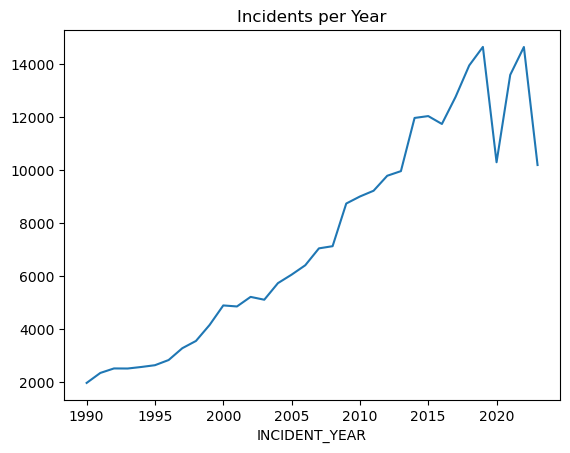

In [109]:
incident_per_year = acs_db["INCIDENT_YEAR"].value_counts().sort_index()
incident_per_year.plot(kind='line', title='Incidents per Year');

#### Explore why there is a drop-off around 2020

Most likely due to covid

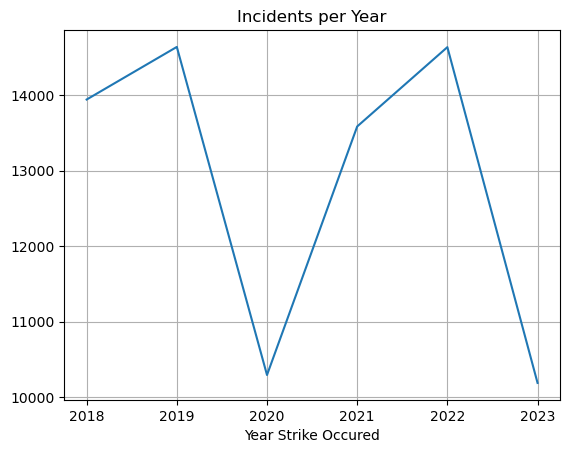

In [110]:
later_year_exploration_db = acs_db[acs_db["INCIDENT_YEAR"] > 2017]
later_year_exploration = later_year_exploration_db["INCIDENT_YEAR"].value_counts().sort_index()
later_year_exploration.plot(kind='line', title='Incidents per Year', grid=True, xlabel="Year Strike Occured");

#### What about "INCIDENT_MONTH" (monthly)?

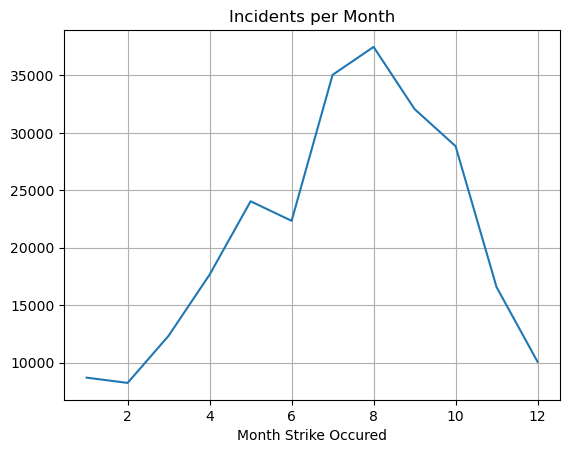

In [111]:
incident_per_month = acs_db["INCIDENT_MONTH"].value_counts().sort_index()
incident_per_month.plot(kind='line', title='Incidents per Month', grid=True, xlabel="Month Strike Occured");

#### What "OPERATOR" (Airline) has the most bird strike occurances?

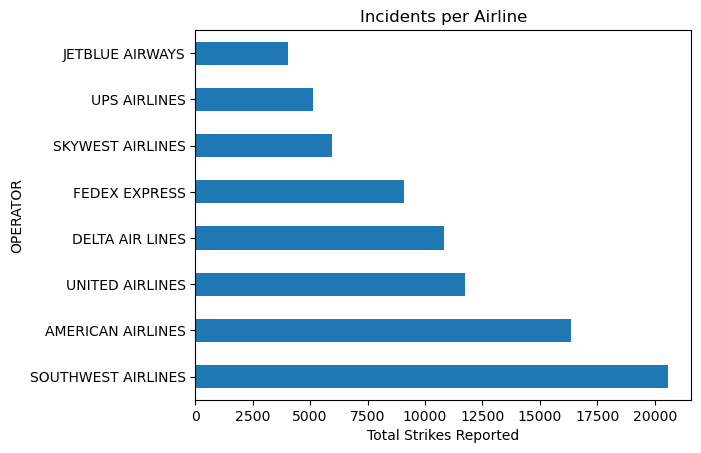

In [112]:
acs_db_named_operators = acs_db[(acs_db["OPERATOR"] != "UNKNOWN") & (acs_db["OPERATOR"] != "BUSINESS")]
incident_per_airline = acs_db_named_operators["OPERATOR"].value_counts().sort_values(ascending=False).head(8)
incident_per_airline.plot(kind='barh', title='Incidents per Airline',xlabel="Total Strikes Reported");

#### During what "PHASE_OF_FLIGHT" do most strikes occur?

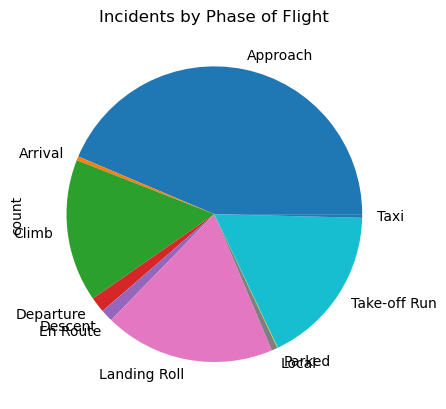

In [149]:
most_common_PHASE_OF_FLIGHT = acs_db["PHASE_OF_FLIGHT"].value_counts().sort_index()
most_common_PHASE_OF_FLIGHT.plot(kind='pie', title='Incidents by Phase of Flight');

#### In what "STATE" (by abbreviation), "AIRPORT_ID" or "AIRPORT" (Airport), do most strikes occur?

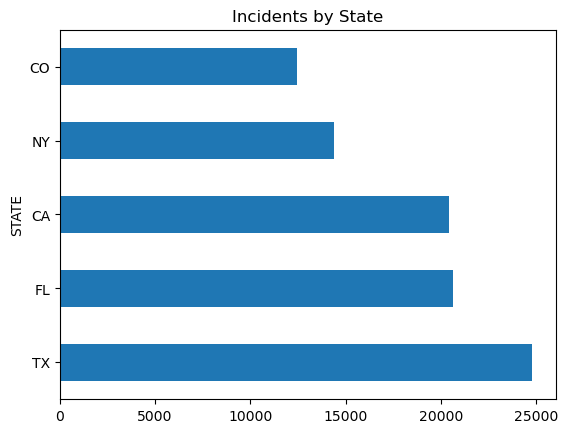

In [145]:
acs_db["STATE"].value_counts().sort_values(ascending=False).head(5).plot(kind='barh', title='Incidents by State');

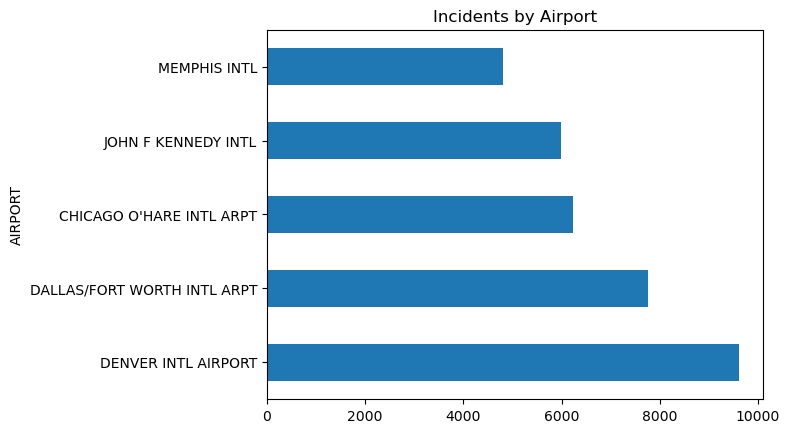

In [144]:
acs_db["AIRPORT"].value_counts().sort_values(ascending=False).head(5).plot(kind='barh', title='Incidents by Airport');

#### For each "AIRPORT_ID" which "RUNWAY" has the most strikes?

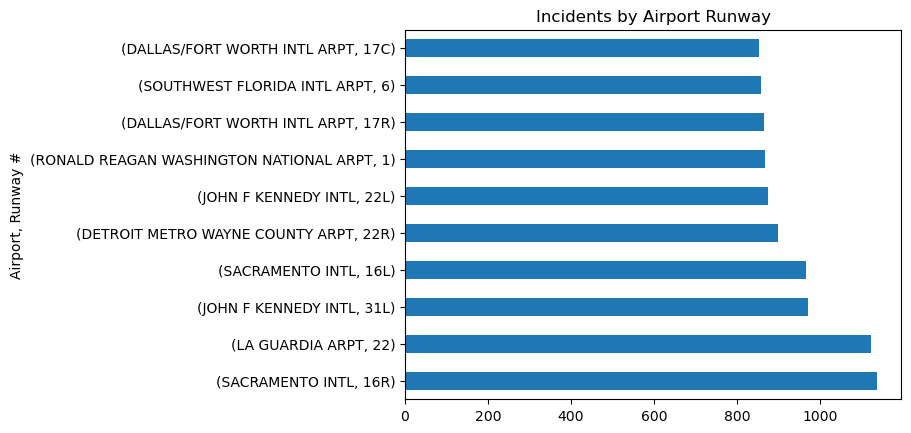

In [150]:
acs_db.groupby("AIRPORT")["RUNWAY"].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', title='Incidents by Airport Runway', ylabel="Airport, Runway #");

#### What "DAMAGE_LEVEL" columns (damage level: N, M, M?, S, D) ... ?

In [136]:
acs_db_damage = acs_db.copy()
acs_db_damage = acs_db_damage.dropna(subset=["DAMAGE_LEVEL"], axis=0)
acs_db_damage["DAMAGE_LEVEL"].value_counts()

DAMAGE_LEVEL
N     138362
M       6761
M?      5454
S       3455
D         59
Name: count, dtype: int64

#### What "AC_CLASS" (Airplane, Helicopter, Glider, Balloon, Dirigible, Gyroplane, Ultralight, Other, Unknown) (Definitions in the data/readme.xlxs) has the most bird strikes?

Apparently, only Airplanes are reported in this data set currently despite the column's suggestion and key in the readme

In [158]:
non_airplane_strikes = acs_db[acs_db["AC_CLASS"] != "A"]
#non_airplane_strikes.value_counts().plot(kind='barh', title="Reports by Aircraft Class")
non_airplane_strikes["AC_CLASS"]

49        NaN
71        NaN
75        NaN
135       NaN
202       NaN
         ... 
288800    NaN
288801    NaN
288802    NaN
288803    NaN
288809    NaN
Name: AC_CLASS, Length: 82669, dtype: object

#### Does "ENG_{number}_POS" (Engine Position) affect bird strikes for each "TYPE_ENG" (engine type)

Frequency of multiple engine aircraft, by configuration

In [ ]:
# 4 boxplots, 1 for each engine


Eng 1 only

Eng 2 only

Eng 3 only

Eng 4 only

Eng 1 and 2 for two engine aircraft

#### Does "SKY" and "PRECIPITATION" (weather) have any effect or is it seemingly coincidence?

In [14]:

#fg, ax = plt.subplots()
#ax

#### What "SPECIES" (bird species) has the most reported strikes? What areas do they occur at most?

In [16]:

#fg, ax = plt.subplots()
#ax

#### Is it more common to hit mulitple birds per strike? How many birds are typically hit?

In [17]:

#fg, ax = plt.subplots()
#ax